# Testing dataset

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("dataset_coding.csv")

In [211]:
# input
x = dataset.iloc[:, :-1].values
  
# output
y = dataset.iloc[:, -1].values

In [212]:
x[0]

array([2.17959409e+00, 1.80000000e+01, 3.59434683e+01, 9.78000000e+02,
       2.61800000e+03, 3.73567609e-01, 9.78219335e-02])

In [213]:
import pickle
model_file='random_model.pkl'

In [214]:
model = pickle.load(open(model_file, 'rb'))



In [215]:
result = model.predict(x)

In [216]:
result

array([1., 1., 1., ..., 1., 1., 1.])

In [217]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [218]:
len(y)

111276

In [219]:
num_ones = np.count_nonzero(result == 0)
num_ones

449

In [220]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(result, y))

Accuracy :  0.9959649879578705


# Graphs

1. Confusion Matrix: A confusion matrix is a table that summarizes the performance of a classification 
    algorithm by comparing the predicted and actual class labels of a dataset.
    It can be used to calculate various metrics such as accuracy, precision, recall, and F1-score.

2. ROC Curve: A receiver operating characteristic (ROC) curve is a graphical representation of the 
    performance of a binary classification algorithm. It plots the true positive rate (sensitivity) 
    against the false positive rate (1-specificity) for different threshold values. A good classifier 
    will have a high true positive rate and a low false positive rate, which will result in an ROC curve 
    that is close to the upper left corner of the plot.

3. Precision-Recall Curve: A precision-recall curve is a graphical representation of the performance of 
    a binary classification algorithm that is based on the precision and recall metrics. It plots the
    precision (positive predictive value) against the recall (true positive rate) for different threshold 
    values. A good classifier will have a high precision and a high recall, which will result in a 
    precision-recall curve that is close to the upper right corner of the plot.

4. Feature Importance Plot: A feature importance plot can be used to visualize the importance of different 
    features (variables) in a machine learning model. In the case of coding and non-coding RNA classification,
    the features could be various sequence-based and structural-based features that are used to train the model.

5. Scatter Plot: A scatter plot can be used to visualize the distribution of the data points in the feature space.
    It can be used to check if there is a clear separation between the coding and non-coding RNA samples, which can
    help to determine if the classification problem is feasible.
    
6. Precision-Recall Trade-off Curve: This curve plots precision against recall for various classification 
    thresholds.It helps in identifying an optimal threshold that balances precision and recall based 
    on the specific requirements of the classification task.

7. Class-wise Performance Comparison: Bar graphs or stacked bar graphs can be used to compare the performance 
    (accuracy, precision, recall, etc.) of the model for coding and noncoding RNA classes separately.
    This visualization allows for a clear understanding of the model's strengths and weaknesses for each class.


# 1.Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y, result)
print(confusion_matrix)


[[    0     0]
 [  937 65863]]


# 2.ROC Curve

/home/pc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


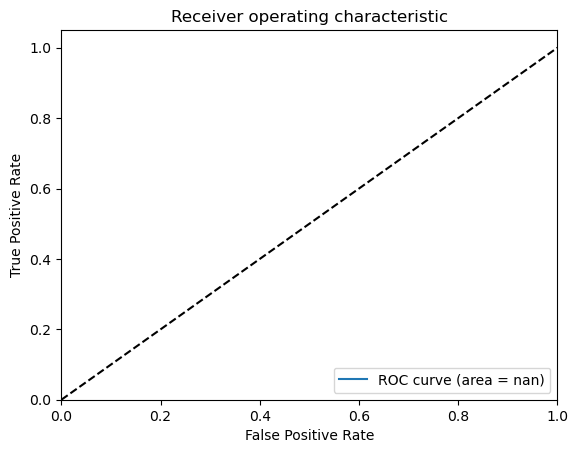

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Calculate the TPR and FPR for different probability thresholds
fpr, tpr, thresholds = roc_curve(y, result)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# 3. Precision-Recall Curve

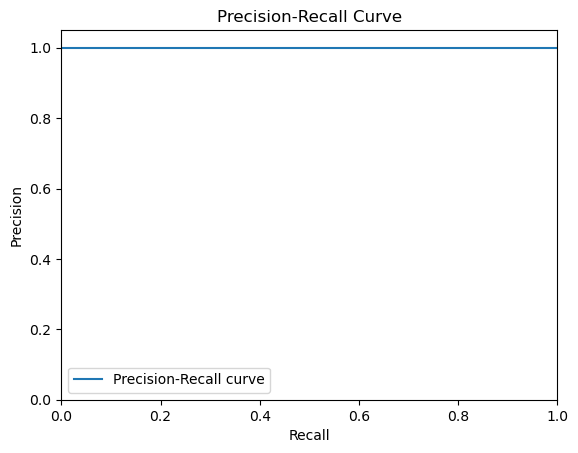

In [71]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt



# Calculate the precision and recall for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y, result)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


# 4. Feature Importance Plot

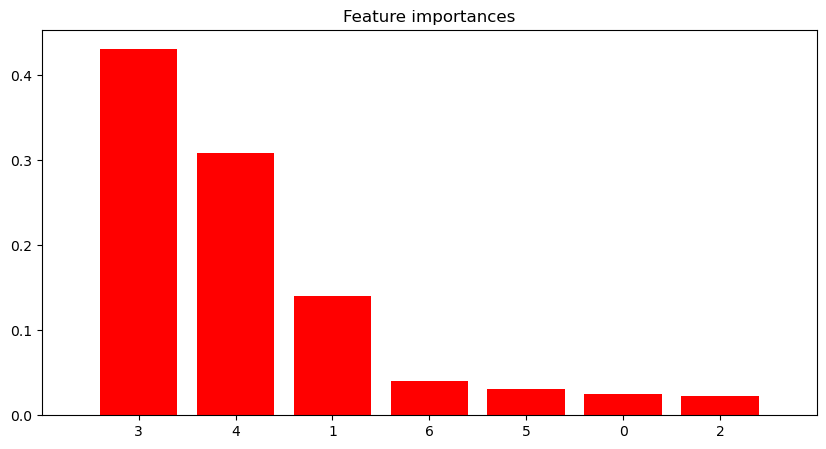

In [221]:
import matplotlib.pyplot as plt


# Get the feature importances
importances =model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()


In [222]:
importances


array([0.02468888, 0.14039653, 0.02322144, 0.43150302, 0.30899829,
       0.03079899, 0.04039287])

# 5. Scatter Plot

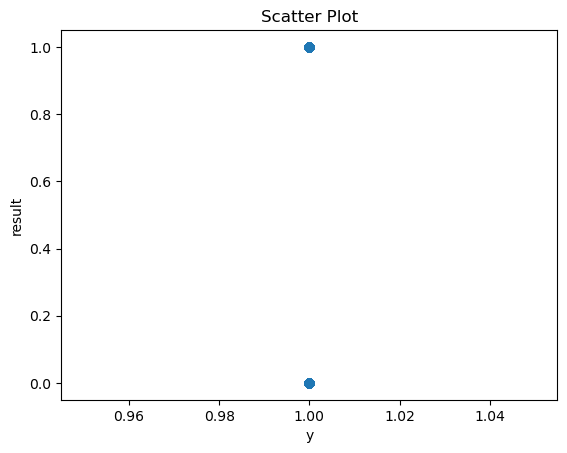

In [80]:
import numpy as np
import matplotlib.pyplot as plt


# Create the scatter plot
plt.scatter(y, result)
plt.xlabel('y')
plt.ylabel('result')
plt.title('Scatter Plot')
plt.show()


# 6. Precision-Recall Trade-off Curve

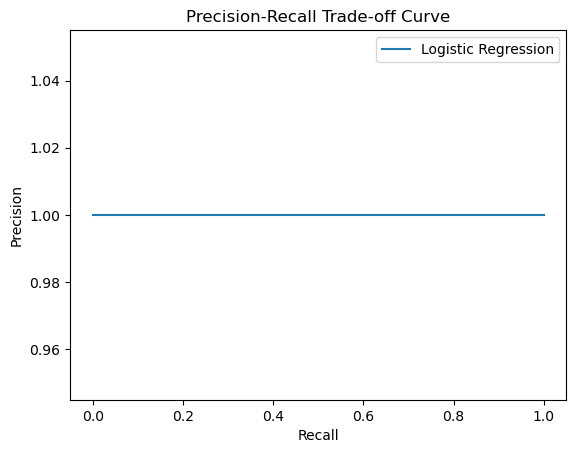

In [83]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predict the probabilities of your test data
probs = model.predict_proba(x)

# Calculate the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y, probs[:, 1])

# Plot the precision-recall trade-off curve
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off Curve')
plt.legend()
plt.show()


# 7. Class-wise Performance Comparison

In [84]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y, result)

# Print the classification report
print(report)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.99      0.99     66800

    accuracy                           0.99     66800
   macro avg       0.50      0.49      0.50     66800
weighted avg       1.00      0.99      0.99     66800



/home/pc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
